In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\dawit\telecom_churnPrediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Main Objective of the Analysis
The objective of this analysis is to predict customer churn using various classification models. This analysis aims to provide actionable insights to reduce churn rates and improve customer retention.

# Data Description
The dataset contains customer information, including demographic details, account information, and service usage. Key attributes include tenure, contract type, payment method, and churn status.

# Data Exploration
We will explore the dataset to understand its structure, identify missing values, and analyze key features.

In [4]:
# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Convert TotalCharges to numeric and handle errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])

# Feature Engineering
We will encode categorical variables and scale numerical features to prepare the data for modeling.

In [6]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Exploratory Data Analysis (EDA)
We will perform deeper EDA to understand the data distribution and relationships between features.

In [7]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

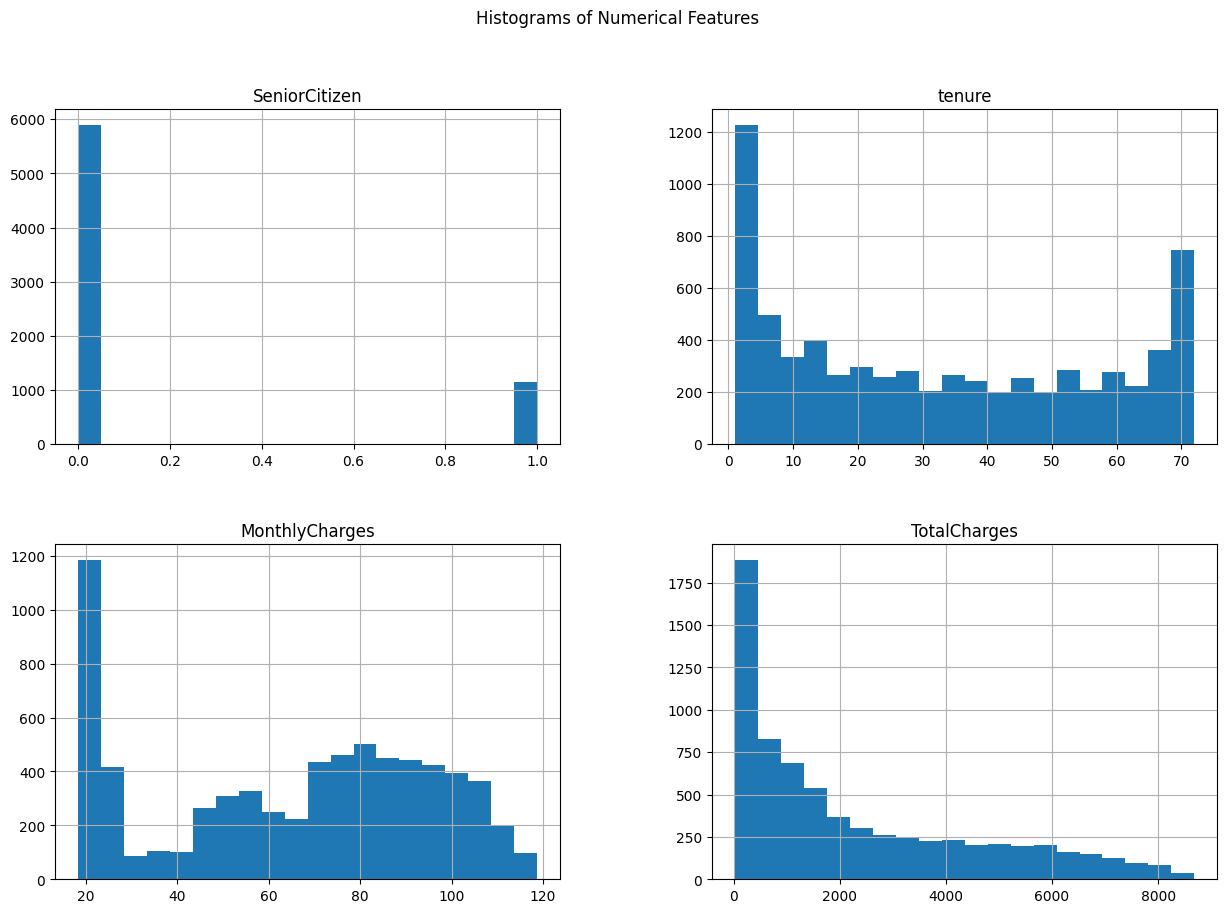

In [8]:
# Plot histograms for numerical features
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

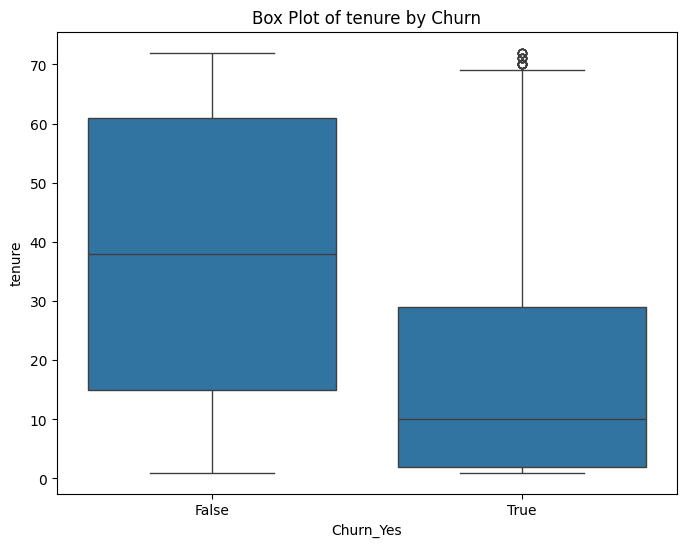

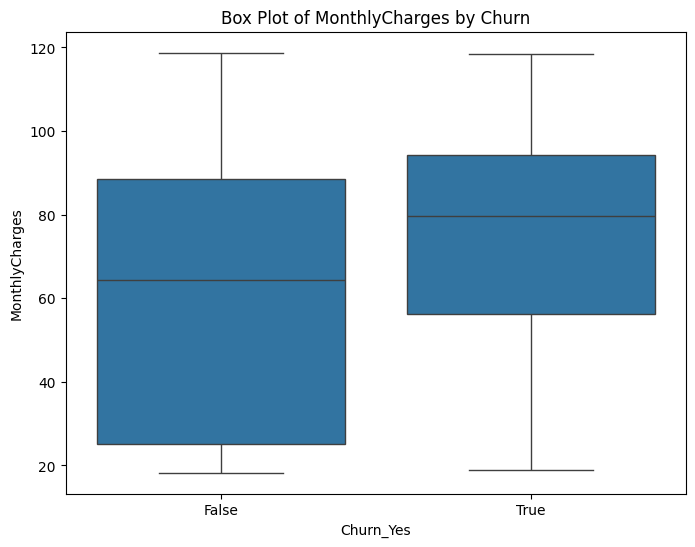

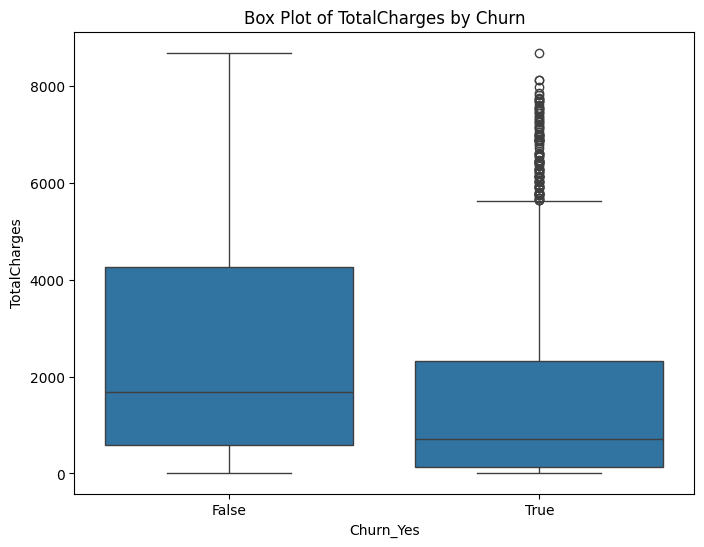

In [9]:
# Box plots for numerical features grouped by churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn_Yes', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Churn')
    plt.show()

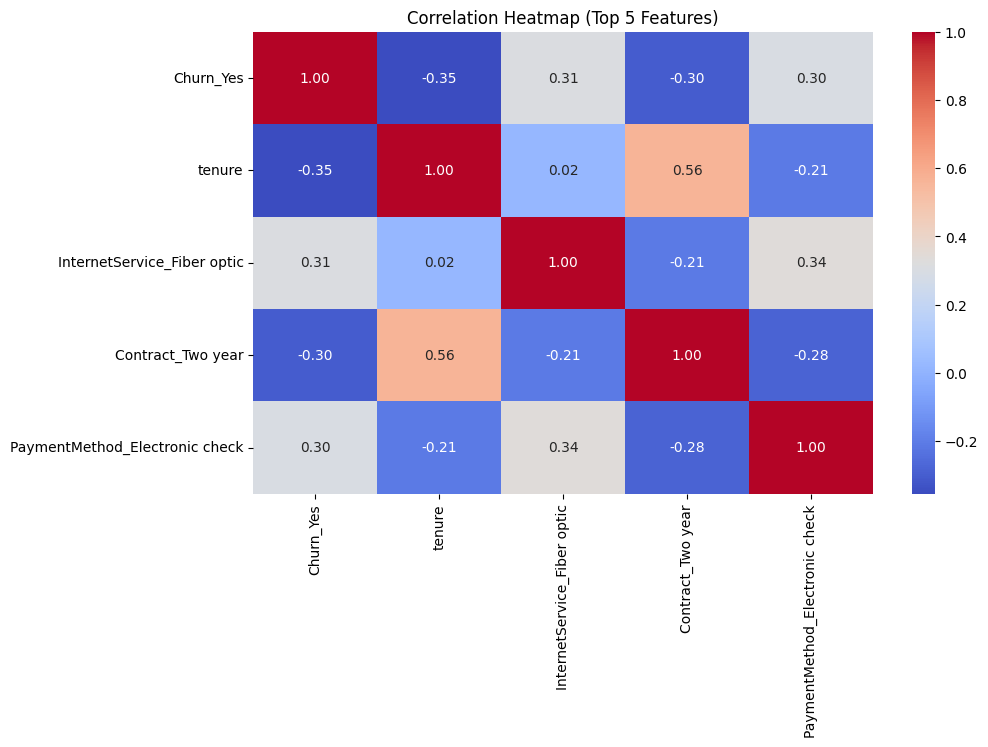

In [10]:
# Optimize correlation heatmap by selecting top 5 features
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
# Select top 5 features most correlated with the target variable
target_correlation = correlation_matrix['Churn_Yes'].abs().sort_values(ascending=False)
top_features = target_correlation.head(5).index
sns.heatmap(correlation_matrix.loc[top_features, top_features], annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Top 5 Features)')
plt.show()

# Check Dataset Balance
We will visualize the distribution of the target variable (Churn) to check if the dataset is balanced.

C:\Users\dawit\AppData\Local\Temp\ipykernel_12696\3000523235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Yes', data=data, palette='viridis')


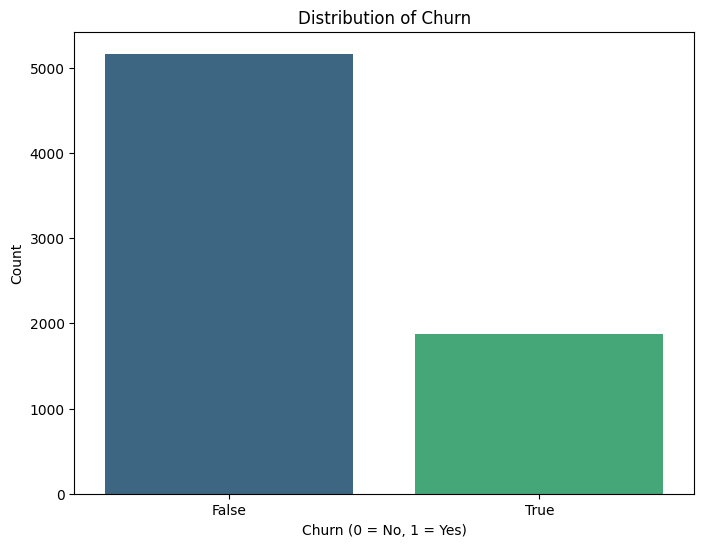

In [11]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=data, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check for Outliers
We will use box plots to identify potential outliers in the numerical features.

C:\Users\dawit\AppData\Local\Temp\ipykernel_12696\1134312814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='viridis')


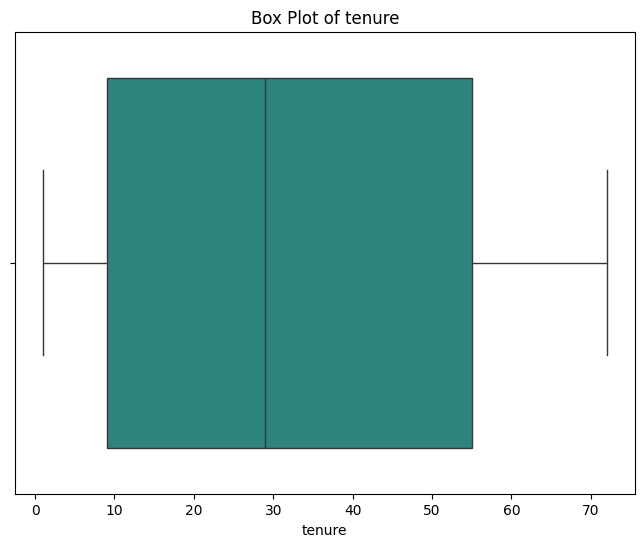

C:\Users\dawit\AppData\Local\Temp\ipykernel_12696\1134312814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='viridis')


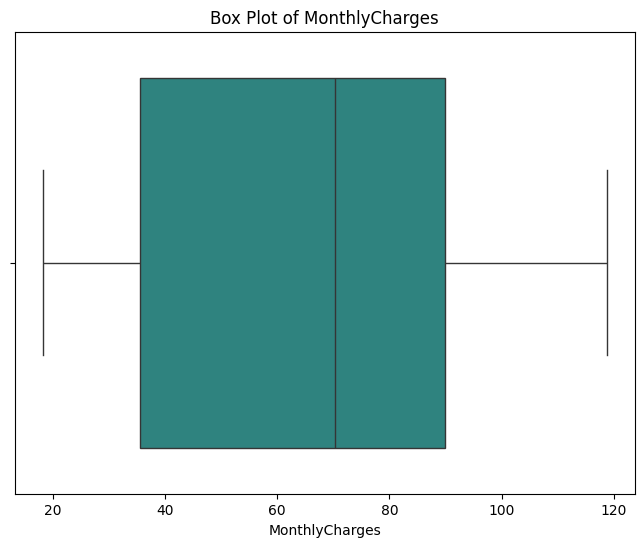

C:\Users\dawit\AppData\Local\Temp\ipykernel_12696\1134312814.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='viridis')


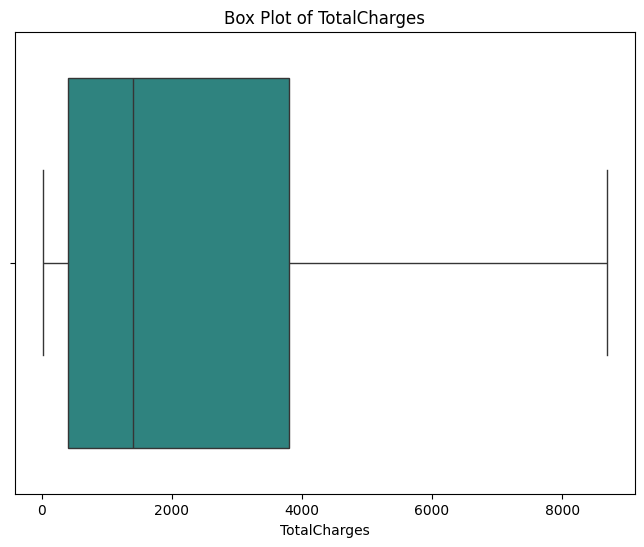

In [12]:
# Box plots for numerical features to check for outliers
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature], palette='viridis')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load data
def load_data(filepath):
    data = pd.read_csv(r"C:\Users\dawit\telecom_churnPrediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data = data.dropna(subset=['TotalCharges'])
    data = pd.get_dummies(data, drop_first=True)
    return data

# Split data
def split_data(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines and hyperparameter grids
def get_pipelines_and_params():
    log_reg_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])
    rf_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier())
    ])
    gb_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gb', GradientBoostingClassifier())
    ])

    log_reg_params = {
        'log_reg__C': [0.1, 1, 10],
        'log_reg__penalty': ['l2']
    }
    rf_params = {
        'rf__n_estimators': [50, 100, 200],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5, 10]
    }
    gb_params = {
        'gb__n_estimators': [50, 100, 200],
        'gb__learning_rate': [0.01, 0.1, 0.2],
        'gb__max_depth': [3, 5, 10]
    }

    return {
        'log_reg': (log_reg_pipeline, log_reg_params),
        'rf': (rf_pipeline, rf_params),
        'gb': (gb_pipeline, gb_params)
    }

# Train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test):
    pipelines_and_params = get_pipelines_and_params()
    results = {}

    for model_name, (pipeline, params) in pipelines_and_params.items():
        random_search = RandomizedSearchCV(pipeline, params, cv=3, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)

        results[model_name] = {
            'best_params': random_search.best_params_,
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred)
        }

    return results

# Save the best model
def save_model(model, filepath):
    import joblib
    joblib.dump(model, filepath)
    print(f"Model saved to {filepath}")

# Update main function to save the best model dynamically
if __name__ == "__main__":
    filepath = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    data = load_data(filepath)
    X_train, X_test, y_train, y_test = split_data(data, 'Churn_Yes')
    results = train_and_evaluate(X_train, X_test, y_train, y_test)

    best_model_name = None
    best_f1_score = 0
    best_model = None

    for model_name, metrics in results.items():
        print(f"Model: {model_name}")
        print(f"Best Parameters: {metrics['best_params']}\n")
        print(f"Accuracy: {metrics['accuracy']}\n")
        print(f"Precision: {metrics['precision']}\n")
        print(f"Recall: {metrics['recall']}\n")
        print(f"F1 Score: {metrics['f1_score']}\n")
        print(f"Classification Report:\n{metrics['classification_report']}\n")

        if metrics['f1_score'] > best_f1_score:
            best_f1_score = metrics['f1_score']
            best_model_name = model_name
            best_model = random_search.best_estimator_  # Save the best model instance

    print(f"Best Model: {best_model_name} with F1 Score: {best_f1_score}")

    # Save the best model dynamically
    if best_model:
        save_model(random_search.best_estimator_, 'model/best_model.pkl')

# Telecom Customer Churn Prediction

## Project Overview
This project aims to predict customer churn for a telecom company using machine learning models. The analysis provides actionable insights to reduce churn rates and improve customer retention. The project includes data preprocessing, exploratory data analysis (EDA), model development, and deployment of a prediction system.

## Project Structure
The project is organized as follows:

```
telecom_churnPrediction/
│
├── flask_backend.py          # Flask backend for serving predictions
├── model_development.py      # Model training and evaluation script
├── streamlit_frontend.py     # Streamlit app for user interaction
├── WA_Fn-UseC_-Telco-Customer-Churn.csv  # Dataset
├── model/
│   └── best_model.pkl        # Trained model file
├── notebooks/
│   ├── eda.ipynb            # Exploratory Data Analysis notebook
│   └── requierements.txt     # Required Python packages
├── images/
│   └── Screenshot (183).png # Placeholder for screenshots
└── README.md                 # Project documentation
```

## Key Components

### 1. Dataset
- **File**: `WA_Fn-UseC_-Telco-Customer-Churn.csv`
- Contains customer information, including demographic details, account information, and service usage.
- Target variable: `Churn_Yes` (1 = Churn, 0 = No Churn).

### 2. Model Development
- **File**: `model_development.py`
- Trains and evaluates machine learning models (Logistic Regression, Random Forest, Gradient Boosting).
- Uses `RandomizedSearchCV` for hyperparameter tuning.
- Saves the best model to `model/best_model.pkl`.

### 3. Backend
- **File**: `flask_backend.py`
- Flask API for serving predictions.
- Endpoints:
  - `/predict`: Accepts customer data and returns churn prediction.
  - `/batch_predict`: Accepts multiple customer records for batch predictions.

### 4. Frontend
- **File**: `streamlit_frontend.py`
- Streamlit app for user interaction.
- Allows users to input customer details and view predictions.

### 5. Exploratory Data Analysis (EDA)
- **File**: `notebooks/eda.ipynb`
- Analyzes data distribution, relationships, and key features.
- Includes visualizations like histograms, box plots, and correlation heatmaps.

## How to Run the Project

### 1. Install Dependencies
Install the required Python packages:
```bash
pip install -r notebooks/requierements.txt
```

### 2. Run the Backend
Start the Flask backend:
```bash
python flask_backend.py
```

### 3. Run the Frontend
Start the Streamlit app:
```bash
streamlit run streamlit_frontend.py
```

### 4. Interact with the App
- Open the Streamlit app in your browser.
- Input customer details to get churn predictions.

## Screenshots
![App Screenshot](images/Screenshot%20(183).png)

## Future Improvements
- Add more features to the dataset for better predictions.
- Deploy the app on a cloud platform (e.g., AWS, Heroku).
- Implement advanced visualization techniques in the EDA.

## License
This project is licensed under the MIT License.